# Check if eye positions fall into the AOI region 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
from matplotlib import image

In [24]:
# File Path
files = 'https://raw.githubusercontent.com/antovich/PyTrackingFinalProject/master/VSTM%20Data%20P18.txt'

In [25]:
# Function to read data file 
def readFile(file):
    filetype = file[-3:]
    if filetype == 'csv':
        data = pd.read_csv(file)
    elif filetype == 'txt':
        data = pd.read_table(file)
    else:
        raise Exception("Error: unsupported file type, please convert to .csv or .txt")
    return data

In [26]:
data = readFile(files)

In [27]:
# Get subject ID
subID = data.ParticipantName.unique()

In [28]:
# Dimension for two AOIs
AOIOneXmin = 204 
AOIOneYmin = 208 
AOIOneXmax = 594 
AOIOneYmax = 561

AOITwoXmin = 777
AOITwoYmin = 208 
AOITwoXmax = 1167 
AOITwoYmax = 561

AOIone = [AOIOneXmin, AOIOneYmin, AOIOneXmax, AOIOneYmax]
AOItwo = [AOITwoXmin, AOITwoYmin, AOITwoXmax, AOITwoYmax]

In [29]:
# Check the number of different displays
imageType = data.MediaName.unique()
len(imageType)

55

In [30]:
# Return the AOI's name, size, and position
def __init__(data,AOI):
    stimName = imageType
    mediaW = abs(AOI[2] - AOI[0])
    mediaH = abs(AOI[3] - AOI[1])

    size = [mediaW, mediaH]
    position = [AOI[0], AOI[1]]
    return stimName, size, position

In [31]:
AOIl = __init__(data,AOIone)
AOIr = __init__(data,AOItwo)

AOItype = 'rectangle'
DisplayList = AOIl[0]
AOIsize = AOIl[1]
AOILposition = AOIl[2]
AOIRposition = AOIr[2]

In [32]:
# Clean data set: remove null positions 
# Borrow from Alea's Create Eyetarcking Heatmap code 

stimCol = 'MediaName'
xCoordCol = 'GazePointX (MCSpx)'
yCoordCol = 'GazePointY (MCSpx)'

def cleanData(data, stimCol, stimName, xCoord, yCoord):
    # Subset the dataframe for only the specified stimulus
    cleaned = data.ix[data[stimCol] == stimName]
        
    # Remove nulls from columns of interest (leaving only instances with x and y coordinates)
    cleaned = cleaned[cleaned[xCoordCol].notnull()]
    cleaned = cleaned[cleaned[yCoordCol].notnull()]
    
    x = cleaned[xCoordCol]
    y = cleaned[yCoordCol]
    
    position = (x, y)
    print type(position)
    return position

In [46]:
# A class to check if the eye position falls into AOI 
class AOI:
    def init(self,aoitype,position,size):
    # AOItype = 'rectangle', 'circle'
    # pos = (x,y) position
    # size = [width height] list 
    
    # Check the format of AOI type and eye position 
        if aoitype not in ['rectangle','circle']:
            raise Exception("Error: aoitype is not recognized.")
        else:
            self.aoitype = aoitype
    
        if type(position) not in [tuple, list]:
            raise Exception("Error: AOI position should be an tuple or list")
        else:
            self.position = position
    
    # check the AOI size
        if type(size) == tuple:
            size = [size[0],size[1]]
        elif type(size) == list:
            pass
        else:
            raise Exception("Error: AOI size should be a list of integer values")    
        self.size = [int(size[0]),int(size[1])]

    # Check if the eye position falls into AOI     
    def contains(self, position):
        inside = 0; 
        if self.aoitype == 'circle':
            if (self.position[0]-position[0])**2 + (self.position[1]-position[1])**2 < self.r**2:
                inside = 1;
        elif self.aoitype == 'rectangle':
            if (position[0] > self.position[0] and position[0] < self.position[0]+self.size[0]) and (position[1] > self.position[1] and position[1] < self.position[1]+self.size[1]):
                inside = 1;
        else:
            raise Exception("Error: aoitype is not recognized.")   
        return inside 

In [47]:
# Eye positions for one type of display 

Position = cleanData(data, stimCol, DisplayList[2], xCoordCol, yCoordCol)

<type 'tuple'>


In [48]:
Position

(57     816.0
 58     810.0
 59     811.0
 60     812.0
 61     814.0
 62     812.0
 63     812.0
 64     818.0
 65     814.0
 66     812.0
 67     808.0
 68     811.0
 69     809.0
 70     811.0
 71     806.0
 72     809.0
 73     807.0
 74     809.0
 75     782.0
 76     639.0
 77     511.0
 78     512.0
 79     502.0
 80     512.0
 81     505.0
 82     499.0
 83     507.0
 84     513.0
 85     514.0
 86     516.0
        ...  
 209    467.0
 210    465.0
 211    474.0
 212    458.0
 213    466.0
 214    466.0
 215    472.0
 216    474.0
 217    473.0
 218    480.0
 219    473.0
 220    467.0
 221    475.0
 222    471.0
 223    477.0
 224    479.0
 225    476.0
 226    472.0
 227    480.0
 228    472.0
 229    480.0
 230    473.0
 231    472.0
 232    476.0
 233    472.0
 234    380.0
 235    278.0
 236    273.0
 237    275.0
 238    274.0
 Name: GazePointX (MCSpx), dtype: float64, 57     405.0
 58     405.0
 59     410.0
 60     411.0
 61     410.0
 62     408.0
 63     406.0
 64   

In [36]:
# Check if the eye positions fall into the left AOI 
sub = AOI()
insideL = []
sub.init(AOItype,AOILposition,AOIsize)
for j in range (57, len(Position[0])+57):
    xCoord = Position[0][j]
    yCoord = Position[1][j]
    p = [xCoord, yCoord]
    if sub.contains(p) == 1:
        insideL.append(p)

In [37]:
# Check if the eye positions fall into the right AOI 
insideR = []
sub.init(AOItype,AOIRposition,AOIsize)
for j in range (57, len(Position[1])+57):
    xCoord = Position[0][j]
    yCoord = Position[1][j]
    p = [xCoord, yCoord]
    # Store the inside range eye positions into a list 
    if sub.contains(p) == 1:
        insideR.append(p)

In [40]:
# A data frame composde of subID, picture type, eye position, AOI type
Ntrial = len(Position[1])
AOIlist = ['Left']*len(insideL) + ['Right']*len(insideR) + ['NaN']*(Ntrial-len(insideL)-len(insideR))
df = pd.DataFrame({'Eye Position' : insideL + insideR + ['Outside']*(Ntrial-len(insideL)-len(insideR)), 
                   'AOI' : AOIlist,
                   'ImageName' : [DisplayList[2]] * Ntrial,
                   'subID' : [subID[0]] * Ntrial})

In [41]:
df

,AOI,Eye Position,ImageName,subID
0,Left,"[511.0, 450.0]",VSTM Red Yellow.jpg,P18
1,Left,"[512.0, 449.0]",VSTM Red Yellow.jpg,P18
2,Left,"[502.0, 452.0]",VSTM Red Yellow.jpg,P18
3,Left,"[512.0, 454.0]",VSTM Red Yellow.jpg,P18
4,Left,"[505.0, 453.0]",VSTM Red Yellow.jpg,P18
5,Left,"[499.0, 497.0]",VSTM Red Yellow.jpg,P18
6,Left,"[507.0, 459.0]",VSTM Red Yellow.jpg,P18
7,Left,"[513.0, 461.0]",VSTM Red Yellow.jpg,P18
8,Left,"[514.0, 458.0]",VSTM Red Yellow.jpg,P18
9,Left,"[516.0, 453.0]",VSTM Red Yellow.jpg,P18


In [42]:
# Display one image type 
def display(size, imagefile=None):
    # construct a black background
    screen = np.zeros((size[1],size[0],3), dtype='uint8')
    if imagefile != None:
        # load image
        img = image.imread(imagefile)
        # flip image over the horizontal axis
        if not os.name == 'nt':
            img = np.flipud(img)
        width, height = len(img[0]), len(img)
        
        # start point 
        x = size[0]/2 - width/2
        y = size[1]/2 - height/2
        
        # Draw the image on the black background 
        screen[y:y+height,x:x+width,:] += img
        
    # Set the figure size in inches 
    dpi = 100.0
    figsize = (size[0]/dpi, size[1]/dpi)
    
    # create a figure
    fig = plt.figure(figsize=figsize, dpi=dpi, frameon=False)
    ax = plt.Axes(fig, [0,0,1,1])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    # plot display
    ax.axis([0,size[0],0,size[1]])
    ax.imshow(screen, origin='upper')
      
    return fig, ax

In [43]:
imagefile = '/Users/xinger/Desktop/Year1-PSC290/VSTM Orange Red.jpg'
size = (1360,768)
fig, ax = display(size, imagefile)

In [45]:
fig, ax = display(size, imagefile=imagefile)

# plot raw eye positions 
plt.scatter(x = Position[0], y = Position[1], c='blue')
ax.invert_yaxis()

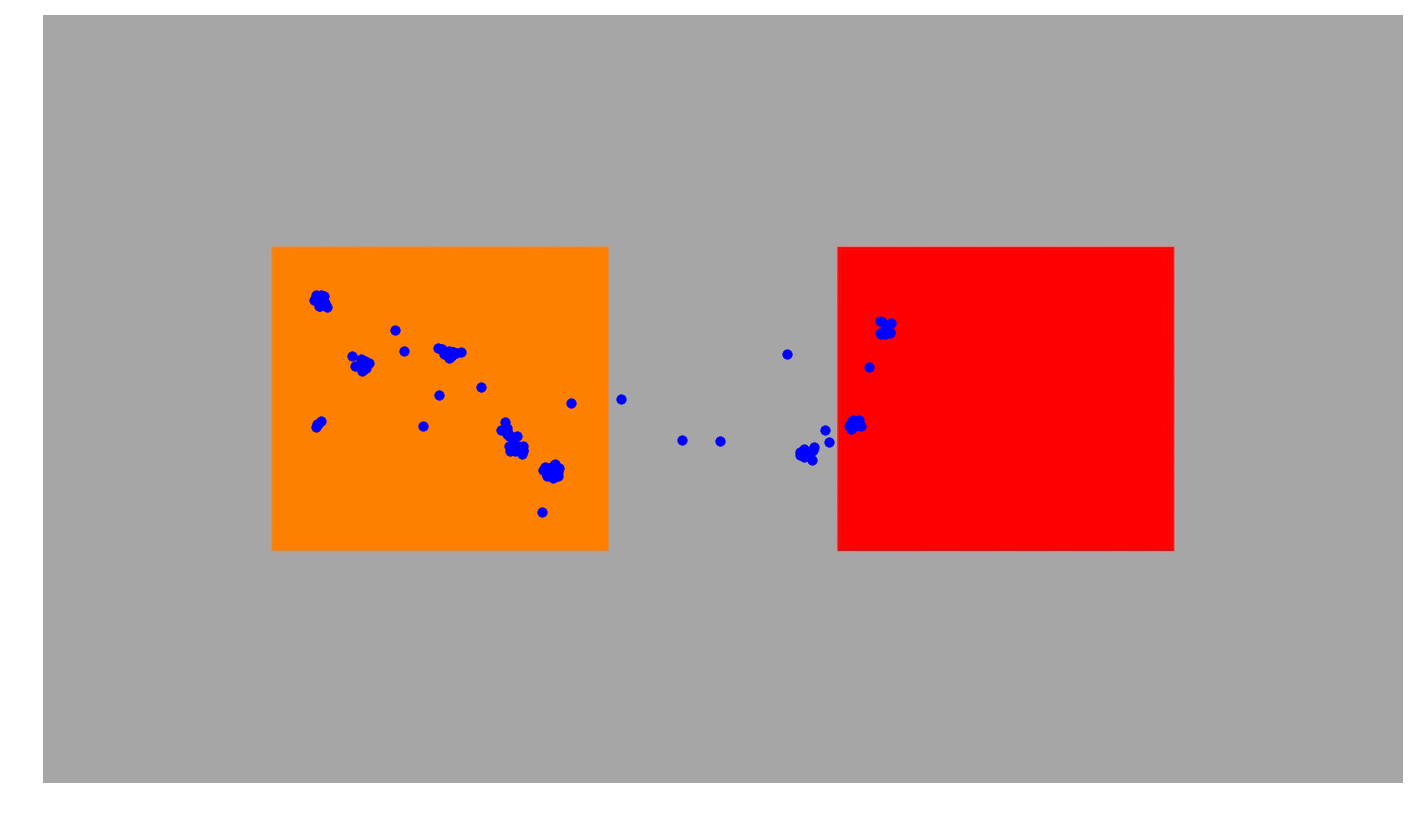

In [54]:
# The blue dots represent for each raw eye position
fig